- OpenClassrooms Project 6, Data Scientist
- Author : Oumeima EL GHARBI
- Date : October, November 2022

### Importing libraries

In [1]:
import pandas as pd
%reset -f

import warnings

warnings.filterwarnings(action="once")

# to compute time of pipeline
from time import time, strftime, gmtime

from preprocess_NLP import *
from common_graphs import *

# NLP
import nltk
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import words

# visualization
import seaborn as sns

from pandarallel import pandarallel

%matplotlib inline
%autosave 300

C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:35: ResourceWarning: unclosed file <_io.TextIOWrapper name='C:\\ProgramData\\Anaconda3\\lib\\site-packages\\wordcloud\\stopwords' mode='r' encoding='cp1252'>
  STOPWORDS = set(map(str.strip, open(os.path.join(FILE, 'stopwords')).readlines()))


Autosaving every 300 seconds


In [2]:
# Starting time
t0 = time()

input_path = "./dataset/cleaned/"
input_filename = "data_text.csv"
input_file = "{}{}".format(input_path, input_filename)

output_path = "./dataset/cleaned/"
output_filename = "final_data_text.csv"
output_file = "{}{}".format(output_path, output_filename)

## Part I : Exploratory Data Analysis

##### General overview

In [3]:
data_text = pd.read_csv(input_file)

In [4]:
data_text.head(5)

,product_name,text,category,target
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4


In [5]:
data_text.tail(5)

,product_name,text,category,target
1045,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0
1046,Wallmantra Large Vinyl Sticker Sticker,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,0
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,0
1048,Wallmantra Medium Vinyl Sticker Sticker,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,0
1049,Uberlyfe Large Vinyl Sticker,Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...,Baby Care,0


In [6]:
data_text.sample(20)

,product_name,text,category,target
284,Services Junction Beautiful Black and Golden c...,Key Features of Services Junction Beautiful Bl...,Home Decor & Festive Needs,3
472,giftsthatwow GTW-G-06,Key Features of giftsthatwow GTW-G-06 Pack of ...,Kitchen & Dining,5
348,Zyxel 3D 1440 - 3G Data Card,Buy Zyxel 3D 1440 - 3G Data Card only for Rs. ...,Computers,2
459,TIGI BED HEAD COLOUR GODDESS OIL INFUSED CONDI...,Key Features of TIGI BED HEAD COLOUR GODDESS O...,Beauty and Personal Care,1
820,Mxofere Combo Rose Soap And Aloevera Lemon Fac...,Buy Mxofere Combo Rose Soap And Aloevera Lemon...,Beauty and Personal Care,1
118,Exotic India Lord Ganesha (Carved in Hematite)...,Buy Exotic India Lord Ganesha (Carved in Hemat...,Home Decor & Festive Needs,3
790,LUBA HF45 Stylo Analog Watch - For Men,LUBA HF45 Stylo Analog Watch - For Men - Buy ...,Watches,6
497,Times 284TMS284 Party-Wedding Analog Watch - ...,Times 284TMS284 Party-Wedding Analog Watch - ...,Watches,6
1014,Toons Printed Baby Boy's Round Neck T-Shirt,Key Features of Toons Printed Baby Boy's Round...,Baby Care,0
6,"Camerii WM64 Elegance Analog Watch - For Men,...","Camerii WM64 Elegance Analog Watch - For Men,...",Watches,6


##### Global Statistics

In [7]:
data_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  1050 non-null   object
 1   text          1050 non-null   object
 2   category      1050 non-null   object
 3   target        1050 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 32.9+ KB


In [8]:
data_text.isna().sum()

product_name    0
text            0
category        0
target          0
dtype: int64

In [9]:
data_text.isna().mean()

product_name    0.0
text            0.0
category        0.0
target          0.0
dtype: float64

In [10]:
data_text.dtypes.value_counts()

object    3
int64     1
dtype: int64

In [11]:
data_text.nunique()

product_name    1050
text            1050
category           7
target             7
dtype: int64

In [12]:
data_text.shape

(1050, 4)

In [13]:
idx = data_text.duplicated(subset="text", keep="first")
data_text.loc[idx, :].sort_values("text")

,product_name,text,category,target


In [14]:
data_text.describe(include="object")

,product_name,text,category
count,1050,1050,1050
unique,1050,1050,7
top,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing
freq,1,1,150


In [15]:
data_text.target.value_counts(normalize=True)

4    0.142857
0    0.142857
6    0.142857
3    0.142857
5    0.142857
1    0.142857
2    0.142857
Name: target, dtype: float64

<AxesSubplot:ylabel='target'>

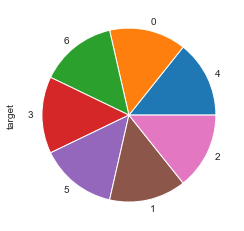

In [16]:
data_text.target.value_counts().plot(kind="pie")

##### Length

In [17]:
data_text.text.apply(lambda i: len(i))

0       1420
1        444
2       1258
3        858
4       1197
        ... 
1045    2432
1046    1660
1047     262
1048     210
1049     187
Name: text, Length: 1050, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='text'>

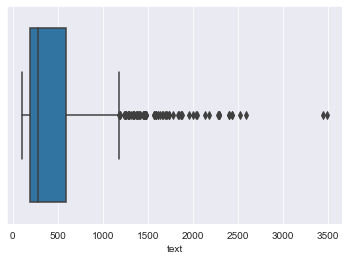

In [18]:
tmp = data_text.text.str.len()
data_text["_len_txt_"] = tmp

sns.boxplot(tmp)

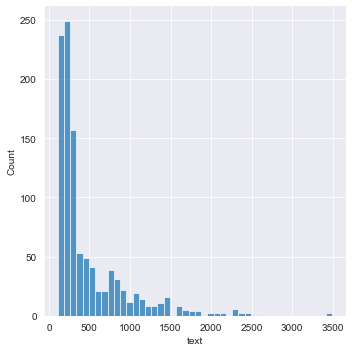

In [19]:
sns.displot(tmp)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='product_name'>

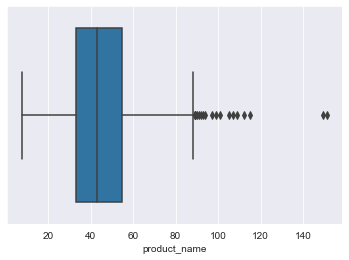

In [20]:
tmp = data_text.product_name.str.len()
data_text["_len_product_name_"] = tmp

sns.boxplot(tmp)

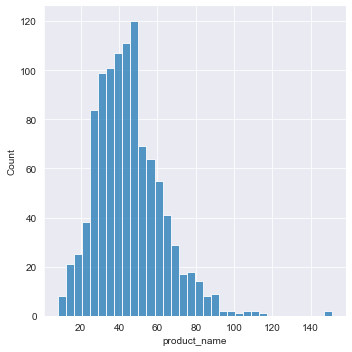

In [21]:
sns.displot(tmp)

In [22]:
data_text

,product_name,text,category,target,_len_txt_,_len_product_name_
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4,1420,58
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0,444,26
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0,1258,35
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4,858,63
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4,1197,53
...,...,...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0,2432,46
1046,Wallmantra Large Vinyl Sticker Sticker,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,0,1660,38
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,0,262,65
1048,Wallmantra Medium Vinyl Sticker Sticker,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,0,210,39


##### Multivariate analysis

In [23]:
corr = data_text.corr()
corr

C:\Users\oumei\AppData\Local\Temp/ipykernel_21656/3719709273.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_text.corr()


,target,_len_txt_,_len_product_name_
target,1.000000,-0.020285,-0.011436
_len_txt_,-0.020285,1.000000,0.174393
_len_product_name_,-0.011436,0.174393,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:302: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)


<AxesSubplot:>

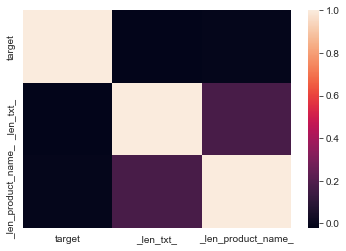

In [24]:
sns.heatmap(corr)

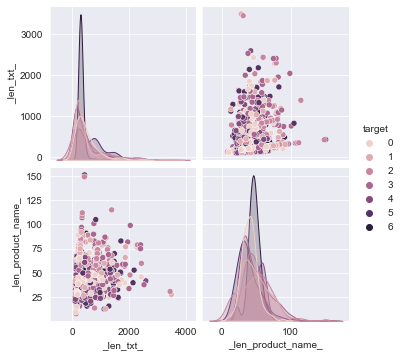

In [25]:
sns.pairplot(data_text, hue="target")

In [26]:
data_text.sort_values("_len_txt_").head(10)

,product_name,text,category,target,_len_txt_,_len_product_name_
877,Nkp Cotton Bath Towel,Buy Nkp Cotton Bath Towel at Rs. 549 at Flipka...,Home Furnishing,4,109,21
890,IWS Cotton Bath Towel,Buy IWS Cotton Bath Towel at Rs. 299 at Flipka...,Home Furnishing,4,109,21
1030,OMRD RD6697 Hot and cold Pack,Specifications of OMRD RD6697 Hot and cold Pac...,Beauty and Personal Care,1,111,29
651,Marvel Cotton Bath Towel,Buy Marvel Cotton Bath Towel at Rs. 449 at Fli...,Baby Care,0,112,24
892,MB Cotton Set of Towels,Buy MB Cotton Set of Towels at Rs. 1195 at Fli...,Home Furnishing,4,112,23
599,Next Steps Baby Girl's Layered Dress,Next Steps Baby Girl's Layered Dress\r\n ...,Baby Care,0,112,36
1005,Milani Runway shadow Wet/Dry Black Out 3 g,Specifications of Milani Runway shadow Wet/Dry...,Beauty and Personal Care,1,113,42
678,Neyth Cotton Set of Towels,Buy Neyth Cotton Set of Towels at Rs. 170 at F...,Baby Care,0,114,26
874,Mafatlal Cotton Bath Towel,Buy Mafatlal Cotton Bath Towel at Rs. 545 at F...,Home Furnishing,4,114,26
884,Amber Cotton Set of Towels,Buy Amber Cotton Set of Towels at Rs. 239 at F...,Home Furnishing,4,114,26


In [27]:
data_text.sort_values("_len_txt_").tail(10)

,product_name,text,category,target,_len_txt_,_len_product_name_
433,"Smartpro 19.5v,3.9a Replacement Charger for Va...","Key Features of Smartpro 19.5v,3.9a Replacemen...",Computers,2,2297,79
435,"Smartpro 19.5v,3.9a Replacement Charger for Va...","Key Features of Smartpro 19.5v,3.9a Replacemen...",Computers,2,2298,79
696,Tallenge Christmas Collection - Nativity Art -...,Tallenge Christmas Collection - Nativity Art -...,Home Decor & Festive Needs,3,2405,75
694,Tallenge Christmas Collection - Echoes Of Wint...,Tallenge Christmas Collection - Echoes Of Wint...,Home Decor & Festive Needs,3,2409,79
1045,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0,2432,46
589,"Shopfloor.XYZ Vacuum Cleaner for Computers, La...","Shopfloor.XYZ Vacuum Cleaner for Computers, La...",Computers,2,2436,60
916,wallskart Floral & Botanical Wallpaper,Key Features of wallskart Floral & Botanical W...,Home Decor & Festive Needs,3,2529,38
715,Pioneer Pragati Floral Single Duvet Orange,Pioneer Pragati Floral Single Duvet Orange (1 ...,Home Furnishing,4,2594,42
639,Sunlast 16 inch Laptop Backpack,Key Features of Sunlast 16 inch Laptop Backpac...,Computers,2,3447,31
437,HomeEdge Solid Wood King Bed,Key Features of HomeEdge Solid Wood King Bed K...,Beauty and Personal Care,1,3490,28


In [28]:
data_text = data_text.drop(columns=["_len_txt_", "_len_product_name_"])
data_text

,product_name,text,category,target
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4
...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0
1046,Wallmantra Large Vinyl Sticker Sticker,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,0
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,0
1048,Wallmantra Medium Vinyl Sticker Sticker,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,0


#### Explore corpus and documents

##### 1) print N random documents

In [29]:
df_sample = data_text.sample(20)
df_sample

,product_name,text,category,target
571,HMT OLSS 01 Analog Watch - For Women,HMT OLSS 01 Analog Watch - For Women - Buy HM...,Watches,6
679,AsiaCraft Goddess of Wealth Laxmi Brass Statue...,Buy AsiaCraft Goddess of Wealth Laxmi Brass St...,Home Decor & Festive Needs,3
88,Craft Trade Oval Wood Coaster Set,Key Features of Craft Trade Oval Wood Coaster ...,Home Furnishing,4
798,Oxyglow Golden Glow Radiance Anti Acne Facial ...,Buy Oxyglow Golden Glow Radiance Anti Acne Fac...,Beauty and Personal Care,1
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,0
164,Rockmantra Colorful Ceramic Mug,Rockmantra Colorful Ceramic Mug (5.5 l)\r\n ...,Kitchen & Dining,5
287,Dreamshomes Velvet Sofa Cover,Specifications of Dreamshomes Velvet Sofa Cove...,Home Furnishing,4
239,Ruchiworld Marble Pot Showpiece - 4 cm,Ruchiworld Marble Pot Showpiece - 4 cm (Ston...,Home Decor & Festive Needs,3
761,Perucci PC-301 Analog Watch - For Men,Perucci PC-301 Analog Watch - For Men - Buy P...,Watches,6
398,Netgear D3600 N600 Dual Band Gigabit Wi-Fi Mod...,Buy Netgear D3600 N600 Dual Band Gigabit Wi-Fi...,Computers,2


In [30]:
for index, series in df_sample.iterrows():
    text_1 = f"target: {series['target']}\n"
    print(text_1 + series["text"] + "..." + "\n\n")

target: 6
HMT OLSS 01 Analog Watch  - For Women - Buy HMT OLSS 01 Analog Watch  - For Women  OLSS 01 Online at Rs.550 in India Only at Flipkart.com. Round Dial, Stainless Steel Back Case, Fold Over Deployment Clasp, Silver Strap, Water Resistant - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!...


target: 3
Buy AsiaCraft Goddess of Wealth Laxmi Brass Statue Showpiece  -  7.62 cm for Rs.350 online. AsiaCraft Goddess of Wealth Laxmi Brass Statue Showpiece  -  7.62 cm at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee....


target: 4
Key Features of Craft Trade Oval Wood Coaster Set Hand Crafted Antique Coaster Apple Shaped Coaster Set,Craft Trade Oval Wood Coaster Set (Brown, Pack of 6) Price: Rs. 299 "Decorate your with this amazing handcrafted Apple shaped coaster set of 6. This coaster set has a been inspired by apple design, which will surely make you fall in love with it. 

##### 2) print documents vs target

In [31]:
def print_sample(sub_df, n_sample=10):
    """
    Prints out n_sample documents from a corpus
    :param sub_df:
    :param n_sample:
    :return:
    """
    sample = sub_df.sample(n_sample)

    for index, series in sample.iterrows():
        text_1 = f"target: {series['target']}\n"
        print(text_1 + series["text"] + "..." + "\n\n")

In [32]:
df_1 = data_text[data_text.target == 1]
df_1.head()

,product_name,text,category,target
43,Burt s Bees Hair Repair Shea And Grapefruit De...,Key Features of Burt s Bees Hair Repair Shea A...,Beauty and Personal Care,1
49,Suave Naturals Everlasting Sunshine Conditioner,Key Features of Suave Naturals Everlasting Sun...,Beauty and Personal Care,1
56,Borse N16 Make Up And Jewellery Vanity Case,Buy Borse N16 Make Up And Jewellery Vanity Cas...,Beauty and Personal Care,1
57,RYTHMX FB NAIL POLISHES BLACK LIPSTICKS IMPORT...,Specifications of RYTHMX FB NAIL POLISHES BLAC...,Beauty and Personal Care,1
58,RYTHMX FB NAIL POLISHES BLACK LIPSTICKS IMPORT...,Key Features of RYTHMX FB NAIL POLISHES BLACK ...,Beauty and Personal Care,1


In [33]:
print_sample(df_1)

target: 1
Flipkart.com: Buy Nike Orange Combo Set online only for Rs. 370 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!...


target: 1
e.l.f. Cosmetics Studio brow Kit Ash Brow Makeup Brush Mirror Girly Elf Fun Sexy 3 g (Dark) Price: Rs. 1,064 Create brows that are fuller, thicker, and more defined! The pigmented wax defines and shapes brows and the color complementing setting powder keeps them looking arched and perfected. The doubled sided taklon brush has one side to help arch your brows while the other side aids in filling them in. This duo provides lasting color definition for a naturally beautiful look.,Specifications of e.l.f. Cosmetics Studio brow Kit Ash Brow Makeup Brush Mirror Girly Elf Fun Sexy 3 g (Dark) Eye Shadow Traits Quantity 3 g Shade Dark...


target: 1
Flipkart.com: Buy Playboy Berlin Combo Set online only for Rs. 349 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cas

In [34]:
df_6 = data_text[data_text.target == 6]
print_sample(df_6)

target: 6
Maxima 01741LPLN Analog Watch  - For Women - Buy Maxima 01741LPLN Analog Watch  - For Women  01741LPLN Online at Rs.650 in India Only at Flipkart.com. Buckle Clasp, Oval Dial, Black Strap, Water Resistant - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!...


target: 6
Calibro SW-125 Analog-Digital Watch  - For Men, Boys
                         Price: Rs. 699
				
			CALIBRO presents MTG Black Dial Round Watch. This is a fashionable watch from MTG that adds to your style statement. This brand is known for its usage of quality material in making appealing watches. It understands the needs of youth so well that it is able to present wide range of watches to its customers. The variety in design, style and youthful approach is very well executed by this brand. Get one and see how brilliantly it leads other brands in style, finish and everything else that matters.
CALIBRO presents MTG Black Dial Round Watch. This is a fashion

## Part II : Text processing

##### Downloads and options

In [35]:
# download

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oumei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\oumei\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\oumei\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\oumei\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [36]:
# pandarallel
pandarallel.initialize(progress_bar=True, nb_workers=6
                       #, verbose=1
                       )

INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [37]:
# init sns
sns.set()

##### Loading data

In [38]:
data_text.head()

,product_name,text,category,target
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4


In [39]:
data_text.shape

(1050, 4)

### I) Cleaning the corpus

#### Work on a specific document

In [40]:
# select a random document

doc = data_text.text.sample(1)  # get a row
doc = doc.values[0]  # get a numpy array
doc

'Buy Unravel India Showpiece  -  16 cm for Rs.1749 online. Unravel India Showpiece  -  16 cm at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.'

##### 1) Lower

In [41]:
doc = doc.lower()
doc

'buy unravel india showpiece  -  16 cm for rs.1749 online. unravel india showpiece  -  16 cm at best prices with free shipping & cash on delivery. only genuine products. 30 day replacement guarantee.'

##### 2) Tokenization

In [42]:
tokens = word_tokenize(doc)
tokens

['buy',
 'unravel',
 'india',
 'showpiece',
 '-',
 '16',
 'cm',
 'for',
 'rs.1749',
 'online',
 '.',
 'unravel',
 'india',
 'showpiece',
 '-',
 '16',
 'cm',
 'at',
 'best',
 'prices',
 'with',
 'free',
 'shipping',
 '&',
 'cash',
 'on',
 'delivery',
 '.',
 'only',
 'genuine',
 'products',
 '.',
 '30',
 'day',
 'replacement',
 'guarantee',
 '.']

In [43]:
len(tokens)

37

In [44]:
len(set(tokens))

28

In [45]:
display_tokens_info(tokens)

nb tokens 37, nb tokens uniques 28
['buy', 'unravel', 'india', 'showpiece', '-', '16', 'cm', 'for', 'rs.1749', 'online', '.', 'unravel', 'india', 'showpiece', '-', '16', 'cm', 'at', 'best', 'prices', 'with', 'free', 'shipping', '&', 'cash', 'on', 'delivery', '.', 'only', 'genuine']
['-', 'unravel', '16', 'india', 'prices', 'buy', 'cm', 'cash', 'at', 'showpiece', 'genuine', 'on', 'for', 'rs.1749', 'online', '&', '.', 'with', 'delivery', 'free', 'shipping', 'best', 'only']


In [46]:
# an other tokenize

tokens = wordpunct_tokenize(doc)
display_tokens_info(tokens)

nb tokens 39, nb tokens uniques 29
['buy', 'unravel', 'india', 'showpiece', '-', '16', 'cm', 'for', 'rs', '.', '1749', 'online', '.', 'unravel', 'india', 'showpiece', '-', '16', 'cm', 'at', 'best', 'prices', 'with', 'free', 'shipping', '&', 'cash', 'on', 'delivery', '.']
['-', 'unravel', '1749', '16', 'india', 'prices', 'buy', 'cm', 'cash', 'at', 'showpiece', 'on', 'rs', 'for', 'online', '&', '.', 'with', 'delivery', 'free', 'shipping', 'best']


##### 3) Stopwords

In [47]:
# stop_words

#global stop_words
#stop_words = set(stopwords.words('english'))
print(stop_words)

{'few', 'as', "mightn't", "shouldn't", 'has', 'itself', "won't", 'was', 'me', 'some', 'now', 's', 'we', "haven't", 'once', 'shan', 'his', "needn't", 'they', 'through', 'were', 'him', 'about', 'these', 'same', 'not', 'himself', 'no', 'ourselves', 'any', 'while', 'their', 'before', 'hasn', 'from', 'shouldn', 'wouldn', 'further', 'hers', 'other', 'them', "you'd", 'below', 'hadn', 't', 'that', 'weren', "wouldn't", 'by', 'it', 'this', 'so', 'needn', 'own', 'up', 'aren', 'her', 'be', 'just', "hadn't", 'until', 'themselves', 'after', 'isn', 'but', 'during', 'over', 'most', 'd', 'having', 'our', 'doing', 'then', "weren't", 'theirs', "should've", 'ma', 'in', 're', 'm', 'should', 've', 'do', "didn't", 'are', "shan't", 'your', 'an', 'or', 'haven', 'more', 'wasn', 'he', "you're", 'all', "couldn't", 'into', 'won', 'y', 'of', 'didn', 'is', "mustn't", 'and', 'down', 'for', 'why', 'mustn', "you've", "you'll", 'where', "doesn't", "it's", 'herself', 'couldn', 'because', "hasn't", 'ours', 'those', 'being

In [48]:
tokens = [w for w in tokens if w not in stop_words]

In [49]:
display_tokens_info(tokens)

nb tokens 34, nb tokens uniques 24
['buy', 'unravel', 'india', 'showpiece', '-', '16', 'cm', 'rs', '.', '1749', 'online', '.', 'unravel', 'india', 'showpiece', '-', '16', 'cm', 'best', 'prices', 'free', 'shipping', '&', 'cash', 'delivery', '.', 'genuine', 'products', '.', '30']
['-', 'unravel', '1749', '16', 'india', 'prices', 'buy', 'cm', 'cash', 'showpiece', 'genuine', 'rs', 'online', '&', '.', 'delivery', 'free', 'shipping', 'best', 'products', '30']


In [50]:
# an other tokenizer

tokenizer = RegexpTokenizer(r"\w+")
tokens = tokenizer.tokenize(doc)
display_tokens_info(tokens)

nb tokens 31, nb tokens uniques 26
['buy', 'unravel', 'india', 'showpiece', '16', 'cm', 'for', 'rs', '1749', 'online', 'unravel', 'india', 'showpiece', '16', 'cm', 'at', 'best', 'prices', 'with', 'free', 'shipping', 'cash', 'on', 'delivery', 'only', 'genuine', 'products', '30', 'day', 'replacement']
['unravel', '1749', '16', 'india', 'prices', 'buy', 'cm', 'cash', 'at', 'showpiece', 'genuine', 'on', 'rs', 'replacement', 'for', 'online', 'with', 'delivery', 'free', 'shipping', 'best', 'products', 'only', '30', 'day']


In [51]:
# remove stopwords

tokens = [w for w in tokens if w not in stop_words]
display_tokens_info(tokens)

nb tokens 26, nb tokens uniques 21
['buy', 'unravel', 'india', 'showpiece', '16', 'cm', 'rs', '1749', 'online', 'unravel', 'india', 'showpiece', '16', 'cm', 'best', 'prices', 'free', 'shipping', 'cash', 'delivery', 'genuine', 'products', '30', 'day', 'replacement', 'guarantee']
['guarantee', 'unravel', '1749', '16', 'india', 'prices', 'buy', 'cm', 'cash', 'showpiece', 'genuine', 'rs', 'replacement', 'online', 'delivery', 'free', 'shipping', 'best', 'products', '30', 'day']


##### 4) First cleaning function

In [52]:
tokens = process_text_1(doc)
display_tokens_info(tokens)

nb tokens 26, nb tokens uniques 21
['buy', 'unravel', 'india', 'showpiece', '16', 'cm', 'rs', '1749', 'online', 'unravel', 'india', 'showpiece', '16', 'cm', 'best', 'prices', 'free', 'shipping', 'cash', 'delivery', 'genuine', 'products', '30', 'day', 'replacement', 'guarantee']
['guarantee', 'unravel', '1749', '16', 'india', 'prices', 'buy', 'cm', 'cash', 'showpiece', 'genuine', 'rs', 'replacement', 'online', 'delivery', 'free', 'shipping', 'best', 'products', '30', 'day']


#### Working on the entire corpus

##### 1) Build raw corpus

In [53]:
# join all corpus

raw_corpus = "".join(data_text.text.values)
raw_corpus[:1_000]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [54]:
len(raw_corpus)

497512

In [55]:
# process the corpus

corpus = process_text_1(raw_corpus)
display_tokens_info(corpus)

nb tokens 61452, nb tokens uniques 6165
['key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'height', 'pack', '2', 'price', 'rs', '899', 'curtain', 'enhances', 'look', 'interiors']
['look', '899', 'door', 'curtain', 'elegance', 'interiors', 'cm', 'polyester', 'abstract', 'features', 'price', 'height', 'enhances', 'rs', '2', '213', 'pack', 'eyelet', 'floral', 'key', 'multicolor']


In [56]:
# value counts

tmp = pd.Series(corpus).value_counts()
tmp

rs           911
products     631
free         618
delivery     567
cash         564
            ... 
drawerkey      1
680            1
roundbuy       1
homeehub       1
dell           1
Length: 6165, dtype: int64

In [57]:
# visualization

#sns.barplot(x=tmp.index, y=tmp.values)

In [58]:
# 30th most common tokens

tmp.head(30)

rs                911
products          631
free              618
delivery          567
cash              564
genuine           564
shipping          564
replacement       559
buy               543
day               540
cm                532
1                 524
30                498
flipkart          475
guarantee         471
com               468
online            396
features          395
price             352
watch             329
color             328
baby              320
mug               318
pack              317
material          312
set               306
type              304
cotton            299
specifications    295
box               291
dtype: int64

In [59]:
# 30th last common tokens

tmp.tail(30)

md199hn                 1
seaterspecifications    1
explode                 1
shot                    1
huawei                  1
sport                   1
ski                     1
1399                    1
ac2400                  1
bornbabykids            1
552                     1
4509                    1
ws331c                  1
architecture            1
5199                    1
socket                  1
1150key                 1
6428nc                  1
585                     1
clothing                1
needybee                1
752dru                  1
susceptible             1
linespecifications      1
esteem                  1
drawerkey               1
680                     1
roundbuy                1
homeehub                1
dell                    1
dtype: int64

In [60]:
tmp.describe()

count    6165.000000
mean        9.967883
std        38.897271
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       911.000000
dtype: float64

In [61]:
# sns.displot(tmp)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

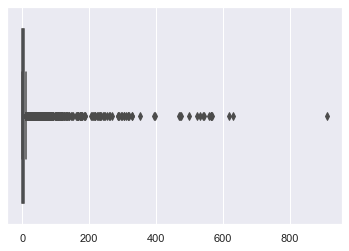

In [62]:
sns.boxplot(tmp)  # 'bad distribution'

##### 2) List rare tokens

In [63]:
# unique words --> not useful

tmp = pd.Series(corpus).value_counts()
list_unique_words = tmp[tmp == 1]
list_unique_words[:30]

paraben         1
vinegar         1
glycol          1
oodles          1
ingredients     1
skip            1
bullshit        1
word            1
soapking        1
hop             1
arabicoudh      1
grass           1
students        1
979             1
leafs           1
vegetarian      1
length225       1
6645            1
quantities      1
sscp            1
582             1
appreciation    1
flawers         1
tulip           1
playing         1
balls           1
ballsech        1
repeatedly      1
pmr1918         1
pmba1872        1
dtype: int64

In [64]:
len(list_unique_words)

2114

In [65]:
list_unique_words = list(list_unique_words.index)
list_unique_words[:30]

['paraben',
 'vinegar',
 'glycol',
 'oodles',
 'ingredients',
 'skip',
 'bullshit',
 'word',
 'soapking',
 'hop',
 'arabicoudh',
 'grass',
 'students',
 '979',
 'leafs',
 'vegetarian',
 'length225',
 '6645',
 'quantities',
 'sscp',
 '582',
 'appreciation',
 'flawers',
 'tulip',
 'playing',
 'balls',
 'ballsech',
 'repeatedly',
 'pmr1918',
 'pmba1872']

In [66]:
# save it for later

tmp = pd.DataFrame({"words": list_unique_words})
tmp.to_csv(output_path + "unique_words.csv", index=False)

In [67]:
# idem for 2 times

tmp = pd.Series(corpus).value_counts()
list_max_2_words = tmp[tmp <= 2]
list_max_2_words[:30]

pokizo                2
knows                 2
deluxe                2
prestige              2
birds                 2
thus                  2
styles                2
880                   2
dean                  2
stage                 2
plus                  2
neckspecifications    2
welcomed              2
milton                2
camerii               2
zipper                2
hourglass             2
pressure              2
bib                   2
850                   2
dat                   2
neckerchew            2
chompers              2
v220w                 2
fashionin             2
velcro                2
cheeky                2
bsf                   2
hilton                2
superb                2
dtype: int64

In [68]:
len(list_max_2_words)

3446

In [69]:
# save it

list_max_2_words = list(list_max_2_words.index)
tmp = pd.DataFrame({"words": list_max_2_words})
tmp.to_csv(output_path + "max_2_words.csv", index=False)

In [70]:
# idem for 5 times

tmp = pd.Series(corpus).value_counts()
list_max_5_words = tmp[tmp <= 5]
list_max_5_words[:30]

opener       5
dummy        5
marvel       5
ordinary     5
following    5
watche       5
belt         5
layers       5
trendnet     5
burner       5
fb           5
beach        5
moist        5
995          5
attention    5
vatika       5
strip        5
intel        5
across       5
colored      5
styling      5
appealing    5
polishes     5
serving      5
winter       5
lace         5
loves        5
320          5
fluffy       5
straps       5
dtype: int64

In [71]:
len(list_max_5_words)

4677

In [72]:
# save it

list_max_5_words = list(list_max_5_words.index)
tmp = pd.DataFrame({"words": list_max_5_words})
tmp.to_csv(output_path + "max_5_words.csv", index=False)

##### 3) 2nd cleaning function

In [73]:
display_tokens_info(corpus)

nb tokens 61452, nb tokens uniques 6165
['key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'height', 'pack', '2', 'price', 'rs', '899', 'curtain', 'enhances', 'look', 'interiors']
['look', '899', 'door', 'curtain', 'elegance', 'interiors', 'cm', 'polyester', 'abstract', 'features', 'price', 'height', 'enhances', 'rs', '2', '213', 'pack', 'eyelet', 'floral', 'key', 'multicolor']


In [74]:
len(set(corpus))

6165

In [75]:
corpus = process_text_2(raw_corpus,
                        list_rare_words=list_unique_words,
                        rejoin=False)
display_tokens_info(corpus)

nb tokens 51097, nb tokens uniques 3396
['key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhances', 'look', 'interiors', 'curtain', 'made', 'high', 'quality', 'polyester']
['made', 'look', 'door', 'curtain', 'elegance', 'interiors', 'polyester', 'abstract', 'features', 'price', 'height', 'enhances', 'quality', 'pack', 'eyelet', 'floral', 'key', 'multicolor', 'high']


In [76]:
len(set(corpus))

3396

##### 4) Stemming and Lemmatization

Lemmatization is the process of grouping together the different inflected forms of a word, so they can be analyzed as a single item. Lemmatization is similar to stemming, but it brings context to the words. So it links words with similar meanings to one word.

Stemming is the process if producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers.

In [77]:
# +/- 3s
corpus = process_text_3(raw_corpus, rejoin=False, list_rare_words=list_unique_words)
pd.Series(corpus).sample(30)

49240       polyest
11961         decor
43389    multicolor
35794          come
43337        warmer
40950         black
30976         front
43143      flipkart
40474          line
14062         ceram
4812          price
29164        number
27283        genuin
18431           com
37802         remov
34312       comfort
28973         place
34681          also
9383            say
41143        durabl
27812        attach
28131          girl
38906           buy
34139        weight
16523          ship
19188         basra
30776         short
50247        laptop
33366      christma
23679         black
dtype: object

In [78]:
display_tokens_info(corpus)

nb tokens 51097, nb tokens uniques 2773
['key', 'featur', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhanc', 'look', 'interior', 'curtain', 'made', 'high', 'qualiti', 'polyest']
['made', 'look', 'door', 'curtain', 'enhanc', 'polyest', 'eleg', 'abstract', 'price', 'height', 'qualiti', 'interior', 'featur', 'pack', 'eyelet', 'floral', 'key', 'multicolor', 'high']


In [79]:
corpus_lem = process_text_3(raw_corpus, rejoin=False, lem_or_stem="lem", list_rare_words=list_unique_words)
pd.Series(corpus_lem).sample(30)

39349          fan
31138         mini
48970          box
13760        price
22198     occasion
15139          boy
34658        place
24911    guarantee
21925    available
1278         skmei
32163          buy
14403     solution
19130       height
33619        puppy
14100       retain
21108     delivery
49307       memory
43240         pinc
12570        round
26707       casual
27713          two
12010      antique
40860       cotton
26128       online
35607          day
14184    wonderful
7666         smile
26917        woman
49466          box
47342        oreal
dtype: object

In [80]:
display_tokens_info(corpus_lem)

nb tokens 51097, nb tokens uniques 3123
['key', 'feature', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhances', 'look', 'interior', 'curtain', 'made', 'high', 'quality', 'polyester']
['made', 'look', 'door', 'curtain', 'elegance', 'polyester', 'abstract', 'price', 'height', 'enhances', 'interior', 'quality', 'pack', 'eyelet', 'floral', 'key', 'multicolor', 'feature', 'high']


##### 5) Only english words

In [81]:
pd.Series(words.words()).sample(30)

94564                infumated
121211               mustanger
11456                  apodema
226682                 vaguish
109885             Madonnalike
18576                  barfish
27971               butterjags
161044               pyrotoxin
58371                 dullpate
7853                      Anas
141556                pendicle
130181                    Ohio
76384                   genius
41471               connectant
201840             thermograph
201995                 thetics
230920                    wawa
131514                  Oppian
151656             postgastric
179416              seybertite
226665               vagotonia
123450         neophilological
139286            paratactical
232729            wirelessness
209612                 twattle
33107                   cestus
164006               reassured
1401          achroiocythaemia
109645             macrochiran
137986    pancreatoenterostomy
dtype: object

In [82]:
len(set(words.words()))

235892

In [83]:
eng_words = [i.lower() for i in words.words()]
eng_words[:30]

['a',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'aani',
 'aardvark',
 'aardwolf',
 'aaron',
 'aaronic',
 'aaronical',
 'aaronite',
 'aaronitic',
 'aaru',
 'ab',
 'aba',
 'ababdeh',
 'ababua',
 'abac',
 'abaca',
 'abacate',
 'abacay',
 'abacinate',
 'abacination',
 'abaciscus',
 'abacist',
 'aback',
 'abactinal',
 'abactinally']

In [84]:
len(set(eng_words))

234377

In [85]:
ps = PorterStemmer()
eng_words_stem = [ps.stem(i) for i in eng_words]
display_tokens_info(eng_words_stem)

nb tokens 236736, nb tokens uniques 178311
['a', 'a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron', 'aaron', 'aaron', 'aaronit', 'aaronit', 'aaru', 'ab', 'aba', 'ababdeh', 'ababua', 'abac', 'abaca', 'abac', 'abacay', 'abacin', 'abacin', 'abaciscu', 'abacist', 'aback', 'abactin', 'abactin']
['aardvark', 'aback', 'a', 'aaronit', 'abac', 'aal', 'abacist', 'aam', 'abacay', 'ababua', 'abactin', 'aa', 'aaru', 'aalii', 'abacin', 'aaron', 'aardwolf', 'aba', 'ababdeh', 'aani', 'abaca', 'ab', 'abaciscu']


In [86]:
len(set(eng_words_stem))

178311

In [87]:
lm = WordNetLemmatizer()
eng_words_lem = [lm.lemmatize(i) for i in eng_words]
display_tokens_info(eng_words_lem)

nb tokens 236736, nb tokens uniques 233450
['a', 'a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron', 'aaronic', 'aaronical', 'aaronite', 'aaronitic', 'aaru', 'ab', 'aba', 'ababdeh', 'ababua', 'abac', 'abaca', 'abacate', 'abacay', 'abacinate', 'abacination', 'abaciscus', 'abacist', 'aback', 'abactinal', 'abactinally']
['aardvark', 'aback', 'a', 'abac', 'aal', 'abacist', 'aam', 'aaronitic', 'abacay', 'abacate', 'abactinal', 'ababua', 'abaciscus', 'aa', 'aaru', 'abacinate', 'aalii', 'aaron', 'aaronite', 'aardwolf', 'abactinally', 'aba', 'abacination', 'ababdeh', 'aani', 'abaca', 'ab', 'aaronical', 'aaronic']


In [88]:
len(set(eng_words_lem))

233450

In [89]:
corpus = process_text_4(raw_corpus, rejoin=False, lem_or_stem="stem", list_rare_words=list_unique_words,
                        eng_words=eng_words_stem)

display_tokens_info(corpus)

nb tokens 45937, nb tokens uniques 2166
['key', 'featur', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhanc', 'look', 'interior', 'curtain', 'made', 'high', 'qualiti', 'polyest']
['made', 'look', 'door', 'curtain', 'enhanc', 'polyest', 'eleg', 'abstract', 'price', 'height', 'qualiti', 'interior', 'featur', 'pack', 'eyelet', 'floral', 'key', 'multicolor', 'high']


In [90]:
len(set(corpus))

2166

In [91]:
corpus_lem = process_text_4(raw_corpus, rejoin=False, lem_or_stem="lem", list_rare_words=list_unique_words,
                            eng_words=eng_words_lem)
pd.Series(corpus_lem).sample(30)

43650      residue
37789      premium
31785        color
3958          bowl
16733      charger
32732      genuine
19811        model
10411         grip
43560    polyester
36585        paper
12517         year
31505       bottle
41647     flexible
44469          way
41710         know
31683         cash
15844        paris
39234      purpose
7028          wide
30566         long
20656        white
12544      festive
12406     shipping
12272    aluminium
31590         need
41805          aid
7449      adorable
25372        decal
6037      flexible
23274    guarantee
dtype: object

In [92]:
len(set(corpus_lem))

2333

In [93]:
corpus

['key',
 'featur',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'height',
 'pack',
 'price',
 'curtain',
 'enhanc',
 'look',
 'interior',
 'curtain',
 'made',
 'high',
 'qualiti',
 'polyest',
 'fabric',
 'featur',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'make',
 'room',
 'environ',
 'curtain',
 'ant',
 'wrinkl',
 'anti',
 'shrinkag',
 'eleg',
 'give',
 'home',
 'bright',
 'appeal',
 'design',
 'attent',
 'sure',
 'contemporari',
 'eyelet',
 'curtain',
 'slide',
 'smoothli',
 'draw',
 'apart',
 'first',
 'thing',
 'morn',
 'welcom',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morn',
 'whole',
 'world',
 'draw',
 'even',
 'creat',
 'special',
 'moment',
 'beauti',
 'given',
 'sooth',
 'print',
 'bring',
 'home',
 'eleg',
 'curtain',
 'light',
 'room',
 'get',
 'right',
 'amount',
 'sunlight',
 'specif',
 'eleg',
 'polyest',
 

In [94]:
corpus_lem

['key',
 'feature',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'height',
 'pack',
 'price',
 'curtain',
 'look',
 'interior',
 'curtain',
 'made',
 'high',
 'quality',
 'polyester',
 'fabric',
 'feature',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'make',
 'room',
 'environment',
 'curtain',
 'ant',
 'wrinkle',
 'anti',
 'shrinkage',
 'elegant',
 'give',
 'home',
 'bright',
 'appeal',
 'design',
 'attention',
 'sure',
 'contemporary',
 'eyelet',
 'curtain',
 'slide',
 'smoothly',
 'draw',
 'apart',
 'first',
 'thing',
 'morning',
 'welcome',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morning',
 'whole',
 'world',
 'draw',
 'evening',
 'create',
 'special',
 'moment',
 'beauty',
 'given',
 'soothing',
 'print',
 'bring',
 'home',
 'elegant',
 'curtain',
 'light',
 'room',
 'get',
 'right',
 'amount',
 'sunlight',

In [95]:
tmp = pd.Series(corpus_lem).value_counts()
tmp

product        863
free           618
delivery       567
cash           564
shipping       564
              ... 
captivating      2
nexus            2
teal             2
extended         2
film             2
Length: 2333, dtype: int64

In [96]:
##sns.barplot(x=tmp.index, y=tmp.values)

##### 6) Wordcloud

C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

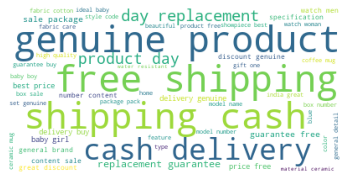

In [97]:
display_wordcloud([corpus_lem])

C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

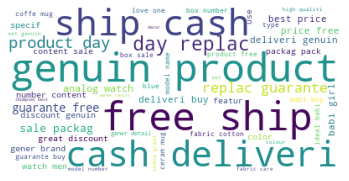

In [98]:
display_wordcloud([corpus])

#### Divide the corpus

##### 1) Separate the 7 categories

In [99]:
for i in range(7):
    globals()["df_" + str(i)] = data_text[data_text.target == i]

In [100]:
df_0.head()

,product_name,text,category,target
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
40,Mom and Kid Baby Girl's Printed Green Top & Py...,Key Features of Mom and Kid Baby Girl's Printe...,Baby Care,0
42,"Mom and Kid Baby Girl's Printed Blue, Grey Top...",Key Features of Mom and Kid Baby Girl's Printe...,Baby Care,0
63,KOHL Wine Bag Yellow,Key Features of KOHL Wine Bag Yellow Easy to c...,Baby Care,0


In [101]:
df_6.head()

,product_name,text,category,target
5,Maserati Time R8851116001 Analog Watch - For ...,Maserati Time R8851116001 Analog Watch - For ...,Watches,6
6,"Camerii WM64 Elegance Analog Watch - For Men,...","Camerii WM64 Elegance Analog Watch - For Men,...",Watches,6
7,T STAR UFT-TSW-005-BK-BR Analog Watch - For Boys,T STAR UFT-TSW-005-BK-BR Analog Watch - For B...,Watches,6
8,"Alfajr WY16B Youth Digital Watch - For Men, Boys","Alfajr WY16B Youth Digital Watch - For Men, B...",Watches,6
9,TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...,TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...,Watches,6


In [102]:
for i in range(7):
    globals()["corpus_" + str(i)] = " ".join(globals()["df_" + str(i)].text)

In [103]:
corpus_0[:1000]

'Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft texture that takes care of your skin and gives you that enriched feeling you deserve. Eurospa has been exporting its bath towels to lot of renowned brands for last 10 years and is famous for its fine prints, absorbency, softness and durability. NOTE: Our product

In [104]:
len(corpus_0)

72541

In [105]:
len(corpus_6)

49083

##### 2) Process all of them

In [106]:
for i in range(7):
    print("\n\n__Before__Category__{}".format(str(i)))
    display_tokens_info(globals()["corpus_" + str(i)])



__Before__Category__0
nb tokens 72541, nb tokens uniques 93
Specifications of Sathiyas Cot
['i', 'n', 'y', 'c', 'f', 't', 's', 'h', 'e', 'p', 'a', 'o', ' ', 'S', 'C']


__Before__Category__1
nb tokens 56618, nb tokens uniques 83
Key Features of Burt s Bees Ha
['t', 'f', 'F', 's', 'r', 'e', 'a', 'B', 'o', ' ', 'u', 'y', 'K', 'H']


__Before__Category__2
nb tokens 83329, nb tokens uniques 87
Key Features of D-Link DAP1320
['n', '0', '-', 'P', 'r', 'a', ' ', 'K', 't', 'f', 'F', 's', 'y', 'A', 'D', '2', 'e', 'L', '3', 'o', 'u', 'i', 'k', '1']


__Before__Category__3
nb tokens 84704, nb tokens uniques 92
Myesquire Ceramic Burner Pot L
['n', 'P', 'r', 'a', 'B', ' ', 'C', 't', 's', 'q', 'y', 'e', 'L', 'o', 'u', 'i', 'c', 'M', 'm']


__Before__Category__4
nb tokens 57118, nb tokens uniques 84
Key Features of Elegance Polye
['n', 'c', 't', 'f', 'P', 'g', 'F', 's', 'r', 'l', 'e', 'a', 'o', ' ', 'u', 'y', 'K', 'E']


__Before__Category__5
nb tokens 95162, nb tokens uniques 85
Key Features of Du

In [107]:
for i in range(7):
    globals()["corpus_" + str(i)] = process_text_4(globals()["corpus_" + str(i)],
                                                   rejoin=False,
                                                   list_rare_words=list_unique_words,
                                                   eng_words=eng_words_stem)

In [108]:
for i in range(7):
    print("\n\n__After__Category__{}".format(str(i)))
    display_tokens_info(globals()["corpus_" + str(i)])



__After__Category__0
nb tokens 7813, nb tokens uniques 790
['specif', 'cotton', 'bath', 'towel', 'bath', 'towel', 'red', 'yellow', 'blue', 'bath', 'towel', 'featur', 'machin', 'washabl', 'ye', 'materi', 'cotton', 'design', 'self', 'design', 'gener', 'brand', 'type', 'bath', 'towel', 'model', 'name', 'cotton', 'bath', 'towel']
['design', 'bath', 'yellow', 'model', 'name', 'gener', 'brand', 'materi', 'specif', 'machin', 'self', 'cotton', 'washabl', 'featur', 'blue', 'red', 'type', 'towel', 'ye']


__After__Category__1
nb tokens 5050, nb tokens uniques 769
['key', 'featur', 'burt', 'bee', 'hair', 'repair', 'shea', 'grapefruit', 'deep', 'condition', 'ideal', 'boy', 'girl', 'appli', 'deep', 'condit', 'hair', 'condit', 'damag', 'hair', 'hair', 'type', 'dri', 'hair', 'specif', 'burt', 'bee', 'hair', 'repair', 'shea']
['damag', 'repair', 'condit', 'shea', 'boy', 'appli', 'bee', 'hair', 'specif', 'dri', 'grapefruit', 'condition', 'ideal', 'featur', 'girl', 'key', 'burt', 'deep', 'type']


__A

In [109]:
corpus_list = [globals()["corpus_" + str(i)] for i in range(7)]

C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

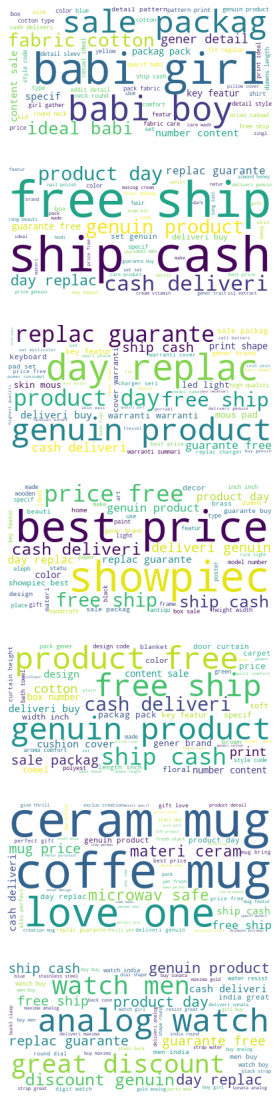

In [110]:
display_wordcloud(corpus_list)

In [111]:
pd.Series(corpus_0).value_counts().head(20)

babi      316
girl      197
cotton    191
detail    180
fabric    164
boy       112
print     105
dress     105
specif    100
ideal      98
gener      96
featur     88
packag     88
sleev      86
type       85
sale       85
color      83
wash       80
neck       80
number     76
dtype: int64

In [112]:
pd.Series(corpus_6).value_counts().head(20)

watch       354
analog      256
men         158
product     136
day         136
deliveri    134
replac      134
cash        134
ship        134
free        134
guarante    134
genuin      134
discount    134
great       134
india       134
buy         134
dial         90
strap        79
boy          67
resist       55
dtype: int64

##### Duplicated words in all of the 7 categories

In [113]:
n = 10
doublons = [i for i in pd.Series(corpus_0).value_counts().head(n).index if
            i in pd.Series(corpus_1).value_counts().head(n).index]

doublons

[]

In [114]:
n = 20
doublons = [i for i in pd.Series(corpus_0).value_counts().head(n).index if
            i in pd.Series(corpus_1).value_counts().head(n).index]

doublons

['type', 'color']

In [115]:
n = 30
doublons = [i for i in pd.Series(corpus_0).value_counts().head(n).index if
            i in pd.Series(corpus_1).value_counts().head(n).index]

doublons

['specif',
 'ideal',
 'gener',
 'featur',
 'type',
 'color',
 'pack',
 'price',
 'box',
 'product',
 'set']

In [116]:
test = generate_duplicated_words_list(corpus_list, n=20)

__Step_1__
__Step_2__
__Step_3__
__Step_4__
__Step_5__
__Step_6__
__Step_7__
__Step_8__
__Step_9__
__Step_10__
__Step_11__
__Step_12__
__Step_13__
__Step_14__
__Step_15__
__Step_16__
__Step_17__
__Step_18__
__Step_19__
__Step_20__
__Step_21__
The length of the list of duplicated words is 130
The length of the set of duplicated words is 26


In [117]:
duplicated_words_set = generate_duplicated_words_list(corpus_list, n=10)

__Step_1__
__Step_2__
__Step_3__
__Step_4__
__Step_5__
__Step_6__
__Step_7__
__Step_8__
__Step_9__
__Step_10__
__Step_11__
__Step_12__
__Step_13__
__Step_14__
__Step_15__
__Step_16__
__Step_17__
__Step_18__
__Step_19__
__Step_20__
__Step_21__
The length of the list of duplicated words is 51
The length of the set of duplicated words is 12


In [118]:
duplicated_words_set

['replac',
 'design',
 'buy',
 'cotton',
 'price',
 'cash',
 'day',
 'product',
 'guarante',
 'deliveri',
 'ship',
 'free']

#### Final cleaning

In [119]:
l = [w for w in list_unique_words if w in eng_words]
print(len(l))

768


In [120]:
len(l)

768

In [121]:
l = [w for w in list_unique_words if w not in eng_words_stem]
print(len(l))

1702


In [122]:
l

['paraben',
 'oodles',
 'ingredients',
 'bullshit',
 'soapking',
 'arabicoudh',
 'students',
 '979',
 'leafs',
 'length225',
 '6645',
 'quantities',
 'sscp',
 '582',
 'appreciation',
 'flawers',
 'playing',
 'balls',
 'ballsech',
 'repeatedly',
 'pmr1918',
 'pmba1872',
 'harmful',
 'objects',
 'counted',
 'merry',
 'pmba1310',
 'cats',
 'leaking',
 'pmr1464',
 'auxiliary',
 'comprehensive',
 '239',
 'bagru',
 '490',
 'trusted',
 'names',
 '710',
 'pots',
 'phonermmw50000160',
 'availed',
 'impeccable',
 '1butter',
 'pmba1044',
 'nt345',
 'dlst2020_red',
 'artrmmw50000330',
 'sonakshi',
 'sinha',
 'pmr1336',
 'pscychological',
 'illusions',
 'hospitality',
 '583',
 'relacement',
 'exciting',
 'vases',
 'nerve',
 'contracture',
 'glycerine',
 'electrodes',
 'offline',
 'breakage',
 'revives',
 '527',
 'machineflipkart',
 'lxbxh',
 'future',
 '18x18x25',
 'hgfvsimstmrn00158',
 'profiles',
 '25cm',
 'mrn',
 'rejuvenative',
 'invigorates',
 'moisturizes',
 'sally',
 'hansen',
 'tubekey',
 '

##### 1) cleaning per document

In [123]:
#data["clean_text"] = data.text.apply(final_clean)
#df = data.copy()
#df["clean_text"] = df.text.parallel_apply(final_clean)

In [124]:
data_text["clean_text"] = data_text.text.apply(
    lambda x: final_clean(x, process_text_5, "stem", l, eng_words_stem, duplicated_words_set))  # l / list_unique_words

In [125]:
data_text.sample(20)

,product_name,text,category,target,clean_text
900,Loreal Diarichesse No- 5 Light Brown ( Pack of...,Key Features of Loreal Diarichesse No- 5 Light...,Beauty and Personal Care,1,key featur loreal light brown pack vol develop...
938,eCraftIndia Lord Ganesha on Elephant Showpiece...,Buy eCraftIndia Lord Ganesha on Elephant Showp...,Home Decor & Festive Needs,3,lord eleph showpiec lord eleph showpiec best g...
318,Asus Wireless AC2400 Dual-band Gigabit Router,Buy Asus Wireless AC2400 Dual-band Gigabit Rou...,Computers,2,wireless dual band router genuin
780,Perucci PCC-501C Decker Analog Watch - For Men,Perucci PCC-501C Decker Analog Watch - For Me...,Watches,6,decker analog watch men decker analog watch me...
1049,Uberlyfe Large Vinyl Sticker,Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...,Baby Care,0,larg vinyl sticker larg vinyl sticker best genuin
171,Prithish We're All Mad Here Ceramic Mug,Buy Prithish We're All Mad Here Ceramic Mug fo...,Kitchen & Dining,5,mad ceram mug mad ceram mug best genuin
904,Relaxfeel Floral Single Dohar White,Key Features of Relaxfeel Floral Single Dohar ...,Baby Care,0,key featur floral singl white pack color white...
90,Exotic India Adi Buddha Vajrasattva Showpiece ...,Buy Exotic India Adi Buddha Vajrasattva Showpi...,Home Decor & Festive Needs,3,exot india adi buddha showpiec exot india adi ...
516,Sonata 7016YM09 Watch,Sonata 7016YM09 Watch - Buy Sonata 7016YM09 Wa...,Watches,6,sonata watch sonata watch india great discount...
833,Tapawire Portable USB Flexible Stick Dimmable ...,Buy Tapawire Portable USB Flexible Stick Dimma...,Computers,2,portabl flexibl stick touch switch super brigh...


In [126]:
sub_data = data_text[data_text.target == 0]

for index, series in sub_data.sample(10).iterrows():
    print("__Before__")
    print(series["text"], end="\n\n")
    print("__After__")
    print(series["clean_text"], end="\n\n\n")
    print()

__Before__
U & ME Cotton Plastic Diaper Reuseable Pad Small -Blue
                         Price: Rs. 270
				
			Cotton plastic diaper name tells it all it is a nappy for the lil one with cotton fabric outside and plastic inside with pad in it to make the baby feel comfortable it in suitable size for child 2-6 months. Hand wash recommended.
Cotton plastic diaper name tells it all it is a nappy for the lil one with cotton fabric outside and plastic inside with pad in it to make the baby feel comfortable it in suitable size for child 2-6 months. Hand wash recommended.

__After__
plastic diaper pad small blue plastic diaper name tell nappi one fabric outsid plastic insid pad make babi feel comfort suitabl size child month hand wash recommend plastic diaper name tell nappi one fabric outsid plastic insid pad make babi feel comfort suitabl size child month hand wash recommend



__Before__
Buy Offspring Solid Single Blanket Pink at Rs. 305 at Flipkart.com. Only Genuine Products. Free Shipp

In [127]:
# check no missing values
data_text.isna().mean()

product_name    0.0
text            0.0
category        0.0
target          0.0
clean_text      0.0
dtype: float64

##### 2) cleaning corpus (per category) (like above) : to display wordcloud

In [128]:
for i in range(7):
    globals()["df_clean_" + str(i)] = data_text[data_text.target == i]

In [129]:
df_clean_0.head()

,product_name,text,category,target,clean_text
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0,specif bath towel bath towel red yellow blue b...
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0,key featur terri face towel set size small hei...
40,Mom and Kid Baby Girl's Printed Green Top & Py...,Key Features of Mom and Kid Baby Girl's Printe...,Baby Care,0,key featur kid babi girl print green top pyjam...
42,"Mom and Kid Baby Girl's Printed Blue, Grey Top...",Key Features of Mom and Kid Baby Girl's Printe...,Baby Care,0,key featur kid babi girl print blue grey top p...
63,KOHL Wine Bag Yellow,Key Features of KOHL Wine Bag Yellow Easy to c...,Baby Care,0,key featur kohl wine bag yellow easi carri bit...


In [130]:
for i in range(7):
    globals()["corpus_clean_" + str(i)] = " ".join(globals()["df_clean_" + str(i)].clean_text)

for i in range(7):
    globals()["corpus_clean_" + str(i)] = process_text_5(globals()["corpus_clean_" + str(i)],
                                                         rejoin=False,
                                                         lem_or_stem="stem",
                                                         list_rare_words=list_unique_words,
                                                         eng_words=eng_words_stem,
                                                         extra_words=duplicated_words_set)

In [131]:
corpus_clean_list = [globals()["corpus_clean_" + str(i)] for i in range(7)]

In [132]:
corpus_clean_0[:1000]

['specif',
 'bath',
 'towel',
 'bath',
 'towel',
 'red',
 'yellow',
 'blue',
 'bath',
 'towel',
 'featur',
 'machin',
 'washabl',
 'materi',
 'self',
 'gener',
 'brand',
 'type',
 'bath',
 'towel',
 'model',
 'name',
 'bath',
 'towel',
 'ideal',
 'men',
 'boy',
 'girl',
 'model',
 'color',
 'red',
 'yellow',
 'blue',
 'size',
 'length',
 'inch',
 'width',
 'inch',
 'box',
 'number',
 'content',
 'packag',
 'packag',
 'bath',
 'towel',
 'key',
 'featur',
 'terri',
 'face',
 'towel',
 'set',
 'size',
 'small',
 'height',
 'inch',
 'terri',
 'face',
 'towel',
 'set',
 'piec',
 'face',
 'towel',
 'set',
 'assort',
 'bring',
 'soft',
 'towel',
 'export',
 'qualiti',
 'soft',
 'textur',
 'care',
 'skin',
 'give',
 'feel',
 'export',
 'bath',
 'towel',
 'renown',
 'brand',
 'last',
 'year',
 'famou',
 'fine',
 'print',
 'absorb',
 'soft',
 'durabl',
 'note',
 'shrinkag',
 'color',
 'may',
 'vari',
 'pictur',
 'size',
 'may',
 'vari',
 'wash',
 'care',
 'wash',
 'cold',
 'water',
 'iron',
 'bl

C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

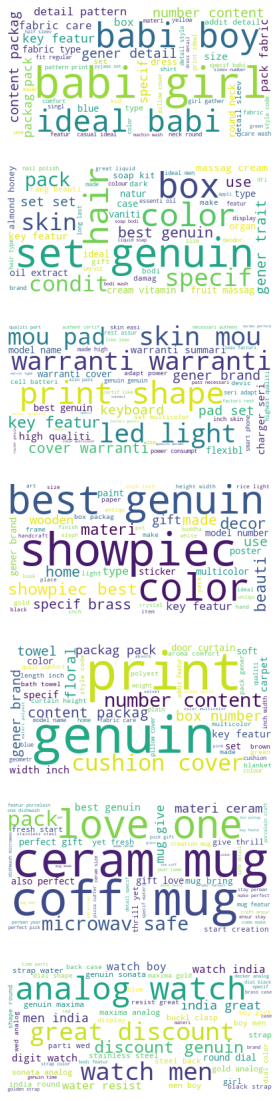

In [133]:
display_wordcloud(corpus_clean_list)

#### Cleaning product_name

In [134]:
raw_corpus = "".join(data_text.product_name.values)
print(raw_corpus[:1_000])
print(len(raw_corpus))

Elegance Polyester Multicolor Abstract Eyelet Door CurtainSathiyas Cotton Bath TowelEurospa Cotton Terry Face Towel SetSANTOSH ROYAL FASHION Cotton Printed King sized Double BedsheetJaipur Print Cotton Floral King sized Double BedsheetMaserati Time R8851116001 Analog Watch  - For BoysCamerii WM64 Elegance Analog Watch  - For Men, BoysT STAR UFT-TSW-005-BK-BR Analog Watch  - For BoysAlfajr WY16B Youth Digital Watch  - For Men, BoysTAG Heuer CAU1116.BA0858 Formula 1 Analog Watch  - For Boys, MenCalibro SW-125 Analog-Digital Watch  - For Men, BoysCartier W6701005 Analog Watch  - For Boys, MenLois Caron LCS-4032 Analog Watch  - For Boys, MenTitan 1639SL03 Analog Watch  - For Boys, MenSrushti Art Jewelry Megnet_Led_Sport_BlackRed1 Digital Watch  - For Men, Women, Boys, GirlsEscort E-1700-906_Blk Analog Watch  - For Men, BoysJack klein BlackLed Digital Watch  - For BoysNorth Moon IW-005-FK Silicone Ion Digital Watch  - For Boys, Girls, WomenFranck Bella FB74C Analog Watch  - For Boys, MenRid

In [135]:
corpus = process_text_1(raw_corpus)
display_tokens_info(corpus)

nb tokens 6191, nb tokens uniques 2531
['elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtainsathiyas', 'cotton', 'bath', 'toweleurospa', 'cotton', 'terry', 'face', 'towel', 'setsantosh', 'royal', 'fashion', 'cotton', 'printed', 'king', 'sized', 'double', 'bedsheetjaipur', 'print', 'cotton', 'floral', 'king', 'sized', 'double', 'bedsheetmaserati']
['fashion', 'bath', 'terry', 'face', 'door', 'elegance', 'curtainsathiyas', 'bedsheetjaipur', 'sized', 'royal', 'polyester', 'abstract', 'cotton', 'double', 'print', 'bedsheetmaserati', 'eyelet', 'floral', 'king', 'multicolor', 'toweleurospa', 'towel', 'setsantosh', 'printed']


C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

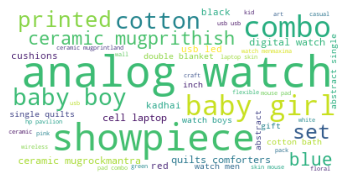

In [136]:
display_wordcloud([corpus])

In [137]:
for i in range(7):
    globals()["corpus_product_name_" + str(i)] = " ".join(globals()["df_" + str(i)].product_name)


In [138]:
corpus_product_name_0[:1000]

"Sathiyas Cotton Bath Towel Eurospa Cotton Terry Face Towel Set Mom and Kid Baby Girl's Printed Green Top & Pyjama Set Mom and Kid Baby Girl's Printed Blue, Grey Top & Pyjama Set KOHL Wine Bag Yellow CHHOTE JANAB COZY MATTRESS PROTECTOR(SET OF 2) Vitamins Solid Baby Girl's Basic Shorts Vitamins Graphic Print Baby Girl's Basic Shorts Vitamins Embroidered Baby Girl's Denim Shorts florence9 baby cap red checks Cap CHINMAY KIDS Printed Cotton Padded Mosquito Net HEAVENLY Dress Baby Boy's  Combo Bestway 1.47m x 1.47m x 1.22m/Play With Sun Shade Inflatable Play Pool TWISHA Printed Kurti & Salwar FS Mini Klub Baby Boy's Sleepsuit Lollipop Lane Tiddly Wink Safari Bath Set Anthill Baby Boy's, Baby Girl's Bodysuit Toffyhouse Baby Boy's Sleepsuit Earth Conscious Graphic Print Baby Boy's Jumpsuit Poppins Printed Baby Boy's Jumpsuit Babeezworld Baby Boy's Romper cherry crumble california Baby Boy's Dungaree Kandyfloss Baby Boy's, Baby Girl's Romper MKB Baby Girl's Shirt Dress Toddla Baby Girl's Gat

In [139]:
len(corpus_product_name_0)

6137

In [140]:
for i in range(7):
    print("\n\n__Before__Category__{}".format(str(i)))
    display_tokens_info(globals()["corpus_product_name_" + str(i)])




__Before__Category__0
nb tokens 6137, nb tokens uniques 69
Sathiyas Cotton Bath Towel Eur
['n', 'h', 'r', 'a', 'B', 'T', ' ', 'S', 'C', 't', 's', 'y', 'E', 'l', 'e', 'o', 'u', 'i', 'w']


__Before__Category__1
nb tokens 7221, nb tokens uniques 74
Burt s Bees Hair Repair Shea A
['i', 'R', 'A', 't', 's', 'r', 'h', 'e', 'B', 'a', 'p', ' ', 'u', 'S', 'H']


__Before__Category__2
nb tokens 7499, nb tokens uniques 72
D-Link DAP1320 RoQ Slim Multim
['n', '0', '-', 'P', ' ', 'S', 't', 'A', 'D', '2', 'Q', 'l', 'L', '3', 'o', 'u', 'i', 'R', 'k', 'M', '1', 'm']


__Before__Category__3
nb tokens 7890, nb tokens uniques 72
Myesquire Ceramic Burner Pot L
['n', 'P', 'r', 'a', 'B', ' ', 'C', 't', 's', 'q', 'y', 'e', 'L', 'o', 'u', 'i', 'c', 'M', 'm']


__Before__Category__4
nb tokens 6503, nb tokens uniques 66
Elegance Polyester Multicolor 
['i', 'n', 'c', 'P', 't', 'g', 's', 'l', 'r', 'M', 'e', 'a', 'o', ' ', 'u', 'y', 'E']


__Before__Category__5
nb tokens 6021, nb tokens uniques 73
Dungri India C

In [141]:
for i in range(7):
    globals()["corpus_product_name_" + str(i)] = process_text_4(globals()["corpus_product_name_" + str(i)],
                                                                rejoin=False,
                                                                list_rare_words=[],
                                                                eng_words=eng_words_stem)

In [142]:
for i in range(7):
    print("\n\n__After__Category__{}".format(str(i)))
    display_tokens_info(globals()["corpus_product_name_" + str(i)])




__After__Category__0
nb tokens 746, nb tokens uniques 249
['cotton', 'bath', 'towel', 'cotton', 'terri', 'face', 'towel', 'set', 'kid', 'babi', 'girl', 'print', 'green', 'top', 'pyjama', 'set', 'kid', 'babi', 'girl', 'print', 'blue', 'grey', 'top', 'pyjama', 'set', 'kohl', 'wine', 'bag', 'yellow', 'cozi']
['babi', 'bath', 'yellow', 'terri', 'face', 'wine', 'green', 'kohl', 'cozi', 'kid', 'set', 'bag', 'grey', 'cotton', 'print', 'girl', 'blue', 'top', 'pyjama', 'towel']


__After__Category__1
nb tokens 731, nb tokens uniques 331
['burt', 'bee', 'hair', 'repair', 'shea', 'grapefruit', 'deep', 'condition', 'suav', 'natur', 'everlast', 'sunshin', 'condition', 'make', 'vaniti', 'case', 'nail', 'polish', 'black', 'lipstick', 'import', 'nail', 'polish', 'black', 'lipstick', 'import', 'scienc', 'dandruff', 'control', 'shampoo']
['everlast', 'repair', 'scienc', 'nail', 'lipstick', 'shea', 'import', 'suav', 'vaniti', 'black', 'bee', 'hair', 'polish', 'control', 'grapefruit', 'condition', 'make

In [143]:
corpus_list_product_name = [globals()["corpus_product_name_" + str(i)] for i in range(7)]


C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

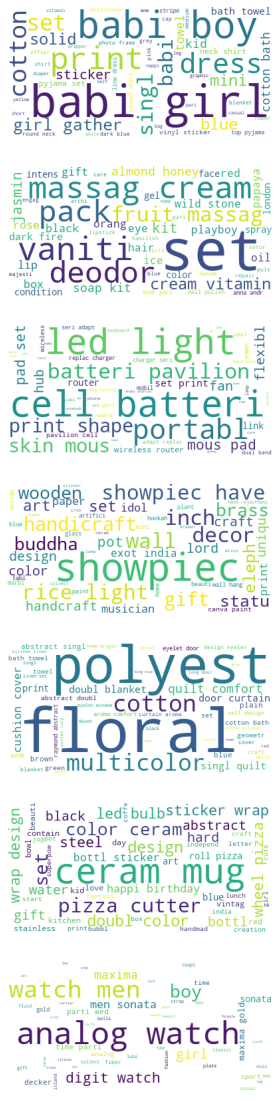

In [144]:
display_wordcloud(corpus_list_product_name)

In [145]:
duplicated_words_set = generate_duplicated_words_list(corpus_list_product_name, n=15)
print(duplicated_words_set)

__Step_1__
__Step_2__
__Step_3__
__Step_4__
__Step_5__
__Step_6__
__Step_7__
__Step_8__
__Step_9__
__Step_10__
__Step_11__
__Step_12__
__Step_13__
__Step_14__
__Step_15__
__Step_16__
__Step_17__
__Step_18__
__Step_19__
__Step_20__
__Step_21__
The length of the list of duplicated words is 16
The length of the set of duplicated words is 11
['light', 'led', 'cotton', 'sticker', 'print', 'boy', 'girl', 'towel', 'singl', 'set', 'doubl']


In [146]:
# idem for 2 times

tmp = pd.Series(corpus).value_counts()
list_max_1_words_product_name = tmp[tmp <= 1]
print(list_max_1_words_product_name[:30])

# save it

list_max_1_words_product_name = list(list_max_1_words_product_name.index)
tmp = pd.DataFrame({"words": list_max_1_words_product_name})
tmp.to_csv(output_path + "product_name_max_1_words.csv", index=False)

carexemex           1
303                 1
38015pl01           1
prabhavali          1
menchappin          1
gtidy               1
multicolorireeya    1
wq18                1
careoxyglow         1
cmantiqueshop       1
blackradhika        1
coral               1
lightsfoolzy        1
98189               1
416                 1
301                 1
womenperucci        1
rked                1
nellson             1
pinkoffspring       1
womenoffspring      1
cnl                 1
qibla               1
toner               1
compass             1
st1025sl07          1
bottleoxyglow       1
rk526               1
elements            1
generation          1
dtype: int64


In [147]:
list_max_1_words_product_name

['carexemex',
 '303',
 '38015pl01',
 'prabhavali',
 'menchappin',
 'gtidy',
 'multicolorireeya',
 'wq18',
 'careoxyglow',
 'cmantiqueshop',
 'blackradhika',
 'coral',
 'lightsfoolzy',
 '98189',
 '416',
 '301',
 'womenperucci',
 'rked',
 'nellson',
 'pinkoffspring',
 'womenoffspring',
 'cnl',
 'qibla',
 'toner',
 'compass',
 'st1025sl07',
 'bottleoxyglow',
 'rk526',
 'elements',
 'generation',
 'watercolors',
 'teal',
 'bodysuitcanon',
 'setsonpra',
 'world',
 'rg',
 'saffron',
 'cartridge',
 'girlslenco',
 'abkl_grn_grn_grnantiqueshop',
 '3003',
 'boysvizion',
 '8502',
 '7purple',
 'girlselantra',
 'tango',
 'dust',
 'plugfogg',
 'covermxofere',
 'store',
 'modish',
 'mb990hn',
 'bdblue',
 'bottleecraftindia',
 'chevron',
 'menmarvel',
 'north',
 'bears',
 'gummy',
 'pineapple',
 'dw100243',
 'mb990ll',
 'dw100405',
 'coupleluba',
 'blackonlinemaniya',
 'figh_008',
 'multicolourfighter',
 'womenbajya',
 'navratri',
 'multicolorsvm',
 'goldrajlaxmi',
 'clues',
 'abkl_pl_pnk_pnkantiquesh

In [148]:
data_text["clean_product_name"] = data_text.product_name.apply(
    lambda x: final_clean(x, process_text_5, "stem", list_max_1_words_product_name, eng_words_stem,
                          []))  # list_max_1_words_product_name duplicated_words_set

In [149]:
data_text.sample(20)

,product_name,text,category,target,clean_text,clean_product_name
526,Fluid FU203-GR01 Analog-Digital Watch - For Men,Fluid FU203-GR01 Analog-Digital Watch - For M...,Watches,6,fluid analog digit watch men fluid analog digi...,analog digit watch men
79,florence9 baby cap red checks Cap,Key Features of florence9 baby cap red checks ...,Baby Care,0,key featur babi cap red check cap red check sp...,babi cap red cap
1007,Aster Luxury Arabic Oudh Bathing Bar - Pack of 4,Key Features of Aster Luxury Arabic Oudh Bathi...,Beauty and Personal Care,1,key featur aster luxuri arab bath bar pack pht...,aster pack
395,Nike Orange Combo Set,Flipkart.com: Buy Nike Orange Combo Set online...,Beauty and Personal Care,1,orang set genuin,orang set
596,V Creations Bonsai Cactus Artificial Plant wi...,Specifications of V Creations Bonsai Cactus Ar...,Home Decor & Festive Needs,3,specif creation bonsai cactu artifici plant po...,creation bonsai artifici plant pot
354,Edimax BR-6288ACL,Buy Edimax BR-6288ACL only for Rs. 2840 from F...,Computers,2,genuin,
592,Babyoye Premium Baby Girl's Multicolor Leggings,Key Features of Babyoye Premium Baby Girl's Mu...,Baby Care,0,key featur premium babi girl multicolor leg mu...,premium babi girl multicolor leg
159,Prithish Merry Christmas Design 4 Double Color...,Prithish Merry Christmas Design 4 Double Color...,Kitchen & Dining,5,christma doubl color ceram mug get talk coffe ...,christma design doubl color ceram mug
1006,e.l.f. Cosmetics Studio brow Kit Ash Brow Make...,e.l.f. Cosmetics Studio brow Kit Ash Brow Make...,Beauty and Personal Care,1,cosmet studio brow kit ash brow brush mirror g...,brow kit brow brush
100,Goldencollections GC4353 Makeup and Jewellery ...,Buy Goldencollections GC4353 Makeup and Jewell...,Beauty and Personal Care,1,vaniti pouch vaniti pouch best genuin,vaniti pouch


In [150]:
sub_data = data_text[data_text.target == 0]

for index, series in sub_data.sample(10).iterrows():
    print("__Before__")
    print(series["product_name"], end="\n\n")
    print("__After__")
    print(series["clean_product_name"], end="\n\n\n")
    print()

__Before__
Sparklings Cotton Checkered Double Bedsheet

__After__
sparkl cotton checker doubl



__Before__
cherry crumble california Baby Boy's Dungaree

__After__
cherri babi boy dungare



__Before__
Babeezworld Baby Boy's Romper

__After__
babi boy romper



__Before__
The Intellect Bazaar Cotton Bath Towel, Baby Towel

__After__
intellect bazaar cotton bath towel babi towel



__Before__
3kFactory Baby Shower Cap- Purple

__After__
babi cap purpl



__Before__
SJ Tulip multi use cotton Balls

__After__
use cotton ball



__Before__
Seals Baby Girl's A-line Dress

__After__
seal babi girl line



__Before__
Beebay Baby Boy's Checkered Casual Shirt

__After__
babi boy checker casual



__Before__
Toffyhouse Baby Boy's Sleepsuit

__After__
babi boy



__Before__
Doraemon Gift Family Ceramic Coffee Mug Multicolour Mug - 325 ml

__After__
gift ceram coffe mug mug





print("Counting number of characters in each row / product")
data_text["_len_clean_text_"] = data_text.clean_text.str.len()
data_text["_len_clean_product_name_"] = data_text.clean_product_name.str.len()


In [151]:
print("Counting number of words in each row / product")
data_text["_len_clean_text_"] = data_text.clean_text.str.split().apply(len)
data_text["_len_clean_product_name_"] = data_text.clean_product_name.str.split().apply(len)


Counting number of words in each row / product


In [152]:
data_text

,product_name,text,category,target,clean_text,clean_product_name,_len_clean_text_,_len_clean_product_name_
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4,key featur eleg polyest multicolor abstract ey...,eleg polyest multicolor abstract eyelet door,136,6
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0,specif bath towel bath towel red yellow blue b...,cotton bath towel,49,3
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0,key featur terri face towel set size small hei...,cotton terri face towel set,118,5
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4,key featur royal fashion print king size doubl...,royal fashion cotton print king size doubl,89,7
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4,key featur print floral king size doubl print ...,print cotton floral king size doubl,118,6
...,...,...,...,...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0,empow extra larg self adhes sticker pack doubl...,extra larg self adhes sticker,215,5
1046,Wallmantra Large Vinyl Sticker Sticker,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,0,larg vinyl sticker sticker pack bring home exc...,larg vinyl sticker sticker,135,4
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,0,extra larg pigment polyvinyl film import stick...,extra larg sticker,16,3
1048,Wallmantra Medium Vinyl Sticker Sticker,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,0,medium vinyl sticker sticker medium vinyl stic...,medium vinyl sticker sticker,10,4


In [153]:
#data_text["_len_clean_text_"].value_counts(normalize=True).plot(kind="pie")

In [154]:
#data_text["_len_clean_text_"].sort_values()
data_text[data_text["_len_clean_text_"] == 0]

,product_name,text,category,target,clean_text,clean_product_name,_len_clean_text_,_len_clean_product_name_


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='_len_clean_text_'>

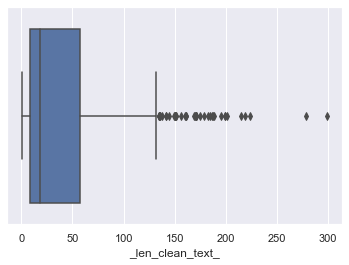

In [155]:
sns.boxplot(data_text["_len_clean_text_"])

In [156]:
data_text[data_text["_len_clean_product_name_"] == 0]

,product_name,text,category,target,clean_text,clean_product_name,_len_clean_text_,_len_clean_product_name_
59,Brillare Science Dandruff Control Shampoo & In...,Specifications of Brillare Science Dandruff Co...,Beauty and Personal Care,1,specif scienc dandruff control shampoo set set...,,23,0
119,FRENEMY MPAD271 Mousepad,Key Features of FRENEMY MPAD271 Mousepad smoot...,Computers,2,key featur smooth surfac finish move quickli g...,,80,0
243,Suruchi Kadhai 4.5 L,Buy Suruchi Kadhai 4.5 L for Rs.965 online. Su...,Kitchen & Dining,5,best genuin,,2,0
244,Bergner Kadhai NA L,"Bergner Kadhai NA L (Aluminium, Non-stick)\r\n...",Kitchen & Dining,5,aluminium non stick get strong temper glass li...,,51,0
245,Kalash Kadhai 11.5 L,Buy Kalash Kadhai 11.5 L for Rs.1584 online. K...,Kitchen & Dining,5,best genuin,,2,0
246,Peacock Kadhai 3.8 L,Buy Peacock Kadhai 3.8 L for Rs.1155 online. P...,Kitchen & Dining,5,peacock peacock best genuin,,4,0
251,Kalash Kadhai 3.5 L,Buy Kalash Kadhai 3.5 L for Rs.549 online. Kal...,Kitchen & Dining,5,best genuin,,2,0
252,Metallino Kadhai NA L,Buy Metallino Kadhai NA L for Rs.721 online. M...,Kitchen & Dining,5,best genuin,,2,0
255,Jaipan KD2.5 Kadhai 2.5 L,Buy Jaipan KD2.5 Kadhai 2.5 L for Rs.499 onlin...,Kitchen & Dining,5,best genuin,,2,0
259,Nirlon Kadhai 3 L,Buy Nirlon Kadhai 3 L for Rs.785 online. Nirlo...,Kitchen & Dining,5,best genuin,,2,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='_len_clean_product_name_'>

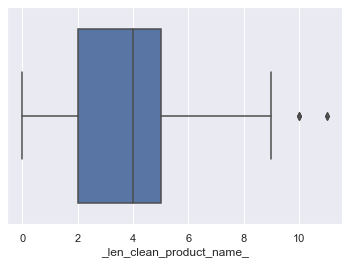

In [157]:
sns.boxplot(data_text["_len_clean_product_name_"])

In [158]:
data_text[(data_text["_len_clean_product_name_"] == 0) & (data_text["_len_clean_text_"] == 0)]

,product_name,text,category,target,clean_text,clean_product_name,_len_clean_text_,_len_clean_product_name_


In [159]:
# save
data_text.to_csv(output_file, index=False)

In [160]:
def clean_text(df):
    pass  #TODOOOO

In [161]:
# End of notebook time
t1 = time()
print("computing time : {:8.6f} sec".format(t1 - t0))
print("computing time : " + strftime('%H:%M:%S', gmtime(t1 - t0)))

computing time : 814.543828 sec
computing time : 00:13:34
